Brohan, A., Brown, N., Carbajal, J., Chebotar, Y., Dabis, J., Finn, C., ... & Zitkovich, B. (2022). [Rt-1: Robotics transformer for real-world control at scale](https://robotics-transformer1.github.io/assets/rt1.pdf). arXiv preprint arXiv:[2212.06817](https://arxiv.org/abs/2212.06817).

**ABSTRACT**
<!-- By transferring knowledge from large, diverse, task-agnostic datasets, modern machine learning models can solve specific downstream tasks either zero-shot or with small task-specific datasets to a high level of performance. While this capability has been demonstrated in other fields such as computer vision, natural language processing or speech recognition, it remains to be shown in robotics, where the generalization capabilities of the models are particularly critical due to the difficulty of collecting real-world robotic data. We argue that one of the keys to the success of such general robotic models lies with open-ended task-agnostic training, combined with high-capacity architectures that can absorb all of the diverse, robotic data. In this paper, we present a model class, dubbed Robotics Transformer, that exhibits promising scalable model properties. We verify our conclusions in a study of different model classes and their ability to generalize as a function of the data size, model size, and data diversity based on a large-scale data collection on real robots performing real-world tasks. The project's website and videos can be found at https://robotics-transformer1.github.io/. -->
通过从大型、多样化、与任务无关的数据集中迁移知识, 现代机器学习模型能够以零样本或使用少量任务专用数据集, 高水平地解决特定下游任务。尽管这种能力已经在计算机视觉、自然语言处理或语音识别等其他领域得到证实, 但在机器人领域仍有待证明, 其中模型的泛化能力尤为重要, 由于收集现实世界机器人数据的难度很大。我们认为, 这种通用机器人模型成功的关键之一在于开放式的任务无关训练, 结合能够吸收所有多样化机器人数据的**高容量架构**。在本文中，我们提出了一个模型类, 称为 Robotics Transformer, 它表现出有希望的可扩展模型属性。我们基于执行现实世界任务的真实机器人收集的大规模数据, 在不同模型类及其(在数据大小、模型大小和数据多样性方面的)泛化能力的研究中, 验证了我们的结论。该项目的网站和视频可以在 https://robotics-transformer1.github.io/ 找到。

# INTRODUCTION
<!-- End-to-end robotic learning, with either imitation or reinforcement, typically involves collecting task-specific data in either single-task (Kalashnikov et al., 2018; Zhang et al., 2018) or multi-task (Kalashnikov et al., 2021b; Jang et al., 2021) settings that are narrowly tailored to the tasks that the robot should perform. This workﬂow mirrors the classic approach to supervised learning in other domains, such as computer vision and NLP, where task-specific datasets would be collected, labeled, and deployed to solve individual tasks, with little interplay between the tasks themselves. Recent years have seen a transformation in vision, NLP, and other domains, away from siloed, small-scale datasets and models and towards large, general models pre-trained on broad, large datasets. The keys to the success of such models lie with open-ended task-agnostic training, combined with high-capacity architectures that can absorb all of the knowledge present in large-scale datasets. If a model can "sponge up" experience to learn general patterns in language or perception, then it can bring them to bear on individual tasks more efficiently. While removing the need for large task-specific datasets is appealing generally in supervised learning, it is even more critical in robotics, where datasets might require engineering-heavy autonomous operation or expensive human demonstrations. We therefore ask: can we train a single, capable, large multi-task backbone model on data consisting of a wide variety of robotic tasks? And does such a model enjoy the benefits observed in other domains, exhibiting zero-shot generalization to new tasks, environments, and objects? -->
无论是使用模仿还是强化的端到端机器人学习, 通常涉及在单任务 (Kalashnikov et al., 2018; Zhang et al., 2018) 或多任务 (Kalashnikov et al., 2021b; Jang et al., 2021) 配置中收集任务专用数据, 这些配置是为机器人要执行的任务而量身定制的。此工作流程反映了其他领域(例如计算机视觉和 NLP)中监督学习的经典方法, 其中任务专用数据集被收集、标注和部署, 以解决单个任务, 而任务彼此之间几乎没有相互作用。近年来, 视觉、NLP 和其他领域已发生了转变, <font color="red">从(孤立的小规模数据集和模型)转向(在广泛的大型数据集上预训练的大型通用模型)</font>。这类模型成功的**关键**在于<font color="red">开放式任务无关训练</font>, 以及<font color="red">能够吸收大规模数据集中展现的所有知识的**高容量架构**</font>。如果一个模型能够"吸收"经验来学习语言或感知中的通用模式, 那么它可以使它们更有效地完成单个任务。尽管消除(对大型任务专用数据集的)需求在监督学习中通常很有吸引力, 这在机器人领域中更为关键, 其中数据集可能需要工程繁重的自主操作或昂贵的人工演示。因此, 我们想知道: 我们能否在(由各种机器人任务组成的)数据上训练一个单独的、功能强大的大型多任务 backbone 模型? 这种模型是否享有其他领域所观察到的收益, 展现出对新任务、环境和对象的零样本泛化?

<!-- Building such models in robotics is not easy. Although recent years have seen several large multi-task robot policies proposed in the literature (Reed et al., 2022; Jang et al., 2021), such models often have limited breadth of real-world tasks, as with Gato (Reed et al., 2022), or focus on training tasks rather than generalization to new tasks, as with recent instruction following methods (Shridhar et al., 2021; 2022), or attain comparatively lower performance on new tasks (Jang et al., 2021). -->
在机器人中构建这样的模型并不容易。尽管近年来文献中提出了几种大型多任务机器人策略 (Reed et al., 2022; Jang et al., 2021), 但这些模型在现实世界任务的广度上往往有限, 例如 Gato (Reed et al., 2022), 或者专注于训练任务而不是泛化到新任务, 例如最近的指令遵循方法 (Shridhar et al., 2021; 2022), 或者在新任务上的表现相对较低 (Jang et al., 2021)。

<span id='fig.1a'></span>
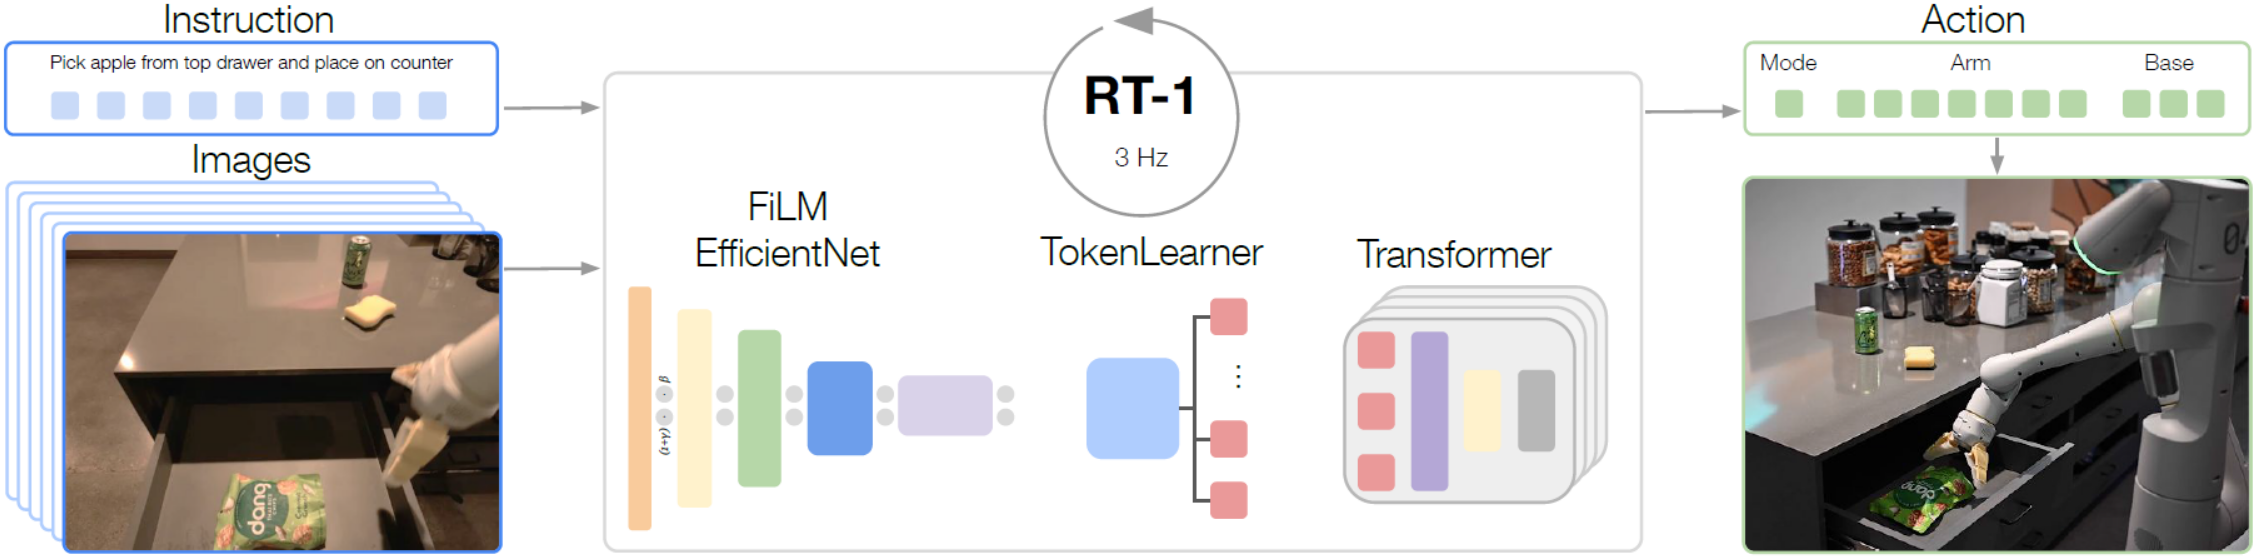
<!-- (a) RT-1 takes images and natural language instructions and outputs discretized base and arm actions. Despite its size (35M parameters), it does this at 3 Hz, due to its efficient yet high-capacity architecture: a FiLM (Perez et al., 2018) conditioned EfficientNet (Tan & Le, 2019), a TokenLearner (Ryoo et al., 2021), and a Transformer (Vaswani et al., 2017). -->
(a) RT-1 接收图像和自然语言指令, 并输出离散化的底座和手臂动作。<font color="red">尽管它的参数数量为 35M, 但它以 3 Hz 的频率运行</font>, 因为其高效且高容量的架构: a FiLM (Perez et al., 2018) conditioned EfficientNet (Tan & Le, 2019), a TokenLearner (Ryoo et al., 2021) 和 a Transformer (Vaswani et al., 2017)。<br>
<span id='fig.1b'></span>
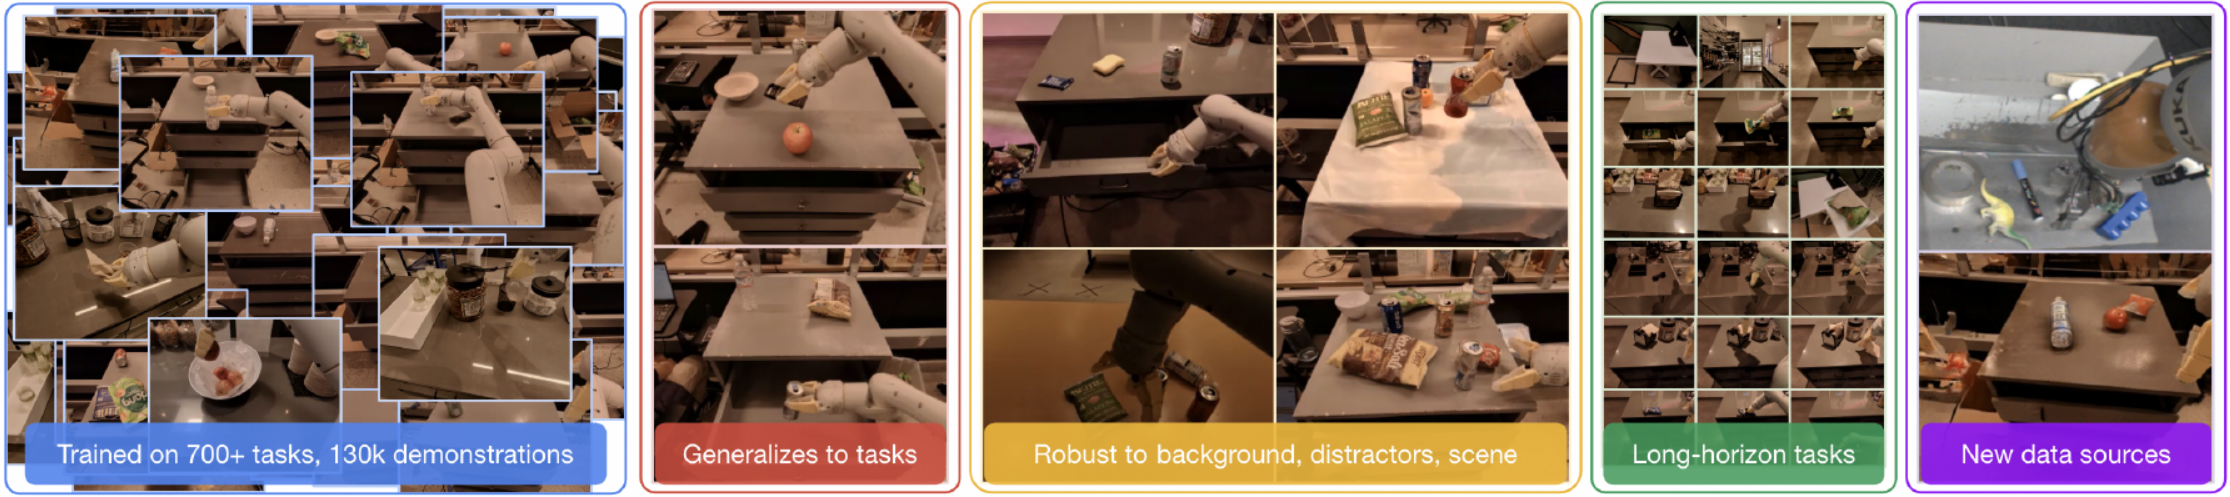
<!-- (b) RT-1's large-scale, real-world training (130k demonstrations) and evaluation (3000 real-world trials) show impressive generalization, robustness, and ability to learn from diverse data. -->
(b) RT-1 的大规模现实世界训练(130k 次演示)和评估(3000 次现实世界试验)展现出令人印象深刻的泛化性、鲁棒性和从多样化数据中学习的能力。<br>
<!-- Figure 1: A high-level overview of RT-1's architecture, dataset, and evaluation. -->
图1: RT-1 架构、数据集和评估的上层概述。

<!-- The two main challenges lie in assembling the right dataset and designing the right model. While data collection and curation is often the "unsung hero" of many large-scale machine learning projects (Radford et al., 2021; Ramesh et al., 2021), this is especially true in robotics, where datasets are often robot-speciﬁc and gathered manually (Dasari et al., 2019; Ebert et al., 2021). As we will show in our evaluations, good generalization requires datasets that combine both scale and breadth, covering a variety of tasks and settings. At the same time, the tasks in the dataset should be suficiently well-connected to enable generalization, such that the model can discover the patterns between structural similar tasks and perform new tasks that combine those patterns in novel ways. We utilize a dataset that we gathered over the course of 17 months with a ﬂeet of 13 robots, containing $\sim$130k episodes and over 700 tasks, and we ablate various aspects of this dataset in our evaluation. -->
两个主要挑战在于组装正确的数据集和设计正确的模型。虽然数据收集和策管通常是许多大型机器学习项目的"无名英雄" (Radford et al., 2021; Ramesh et al., 2021), 但在机器人领域尤其如此, 其中数据集通常是机器人专用的, 并且是手动收集的 (Dasari et al., 2019; Ebert et al., 2021)。正如我们将在评估中展示的那样, 良好的泛化需要结合规模和广度的数据集, 涵盖各种任务和配置。同时, 数据集中的任务应该足够紧密地连接以实现泛化, 以便模型能够发现结构相似的任务之间的模式, 并以新颖的方式组合这些模式来执行新任务。我们利用 13 台机器人在 17 个月的时间里收集的数据集, 包含约 130k episodes 和超过 700 项任务, 并且我们在评估中消融该数据集的各个方面。

<!-- The second challenge lies in the design of the model itself. Effective robotic multi-task learning requires a high capacity model, and Transformer (Vaswani et al., 2017) models excel in this regard, particularly when it is necessary to learn many tasks conditioned, as in our case, on language instructions. However, robotic controllers must also be efﬁcient enough to run in real time, which presents a major challenge for Transformers in particular. We propose a novel architecture that we call RT-1 (Robotics Transformer 1), which by encoding high-dimensional inputs and outputs, including camera images, instructions and motor commands into compact token representations to be used by the Transformer, allows for efﬁcient inference at runtime to make real-time control feasible. -->
第二个挑战在于模型本身的设计。有效的机器人多任务学习需要高容量模型, 而 Transformer (Vaswani et al., 2017) 模型在这方面表现出色, 特别是当需要学习许多以语言指令为条件的任务时, 就像在我们的案例中一样。然而, 机器人控制器还必须足够高效以能实时运行, 这对 Transformer 来说是一个重大挑战。我们提出了一种称为 RT-1 (Robotics Transformer 1) 的新型架构, 通过将高维输入和输出(包括摄像头图像、指令和电机命令)编码为紧凑的 token 表征供 Transformer 使用, 可以在运行时进行高效推理, 从而使实时控制变得可行。

<!-- Our contribution is the RT-1 model and experiments with this model on a large and broad dataset of real-world robotic tasks. Our experiments not only demonstrate that RT-1 can exhibit signiﬁcantly improved generalization and robustness compared to prior techniques, but also evaluate and ablate many design choices in both the model and in the composition of the training set. Our results show that RT-1 can perform over 700 training instructions at 97% success rate, and can generalize to new tasks, distractors, and backgrounds 25%, 36% and 18% better than the next best baseline, respectively. This level of performance allows us to execute very long-horizon tasks in the SayCan (Ahn et al., 2022) framework, with as many as 50 stages. We further show that RT-1 can incorporate data from simulation or even other robot types, retaining performance on the original tasks and improving generalization to new scenarios. A short overview of RT-1 capabilities is presented in Fig. 1b. -->
我们的贡献是 RT-1 模型, 以及用该模型在(庞大而广泛的现实世界机器人任务的)数据集上的实验。我们的实验不仅表明, 与先前的技术相比, RT-1 可以表现出显著改善的泛化和鲁棒性, 而且还评估并消融模型和训练集组成中的许多设计选择。我们的结果表明, RT-1 能够以 97% 的成功率执行超过 700 条训练指令, 并且可以泛化到新任务、干扰因素和背景, 分别比次好基线高 25%、36% 和 18%。这种级别的表现使我们能够在 SayCan (Ahn et al., 2022) 框架中执行非常长时域的任务, 多达 50 个阶段。我们进一步表明, RT-1 可以整合来自模拟甚至其他机器人类型的数据, 保留原始任务的性能并提高对新场景的泛化能力。RT-1 功能的简短概述如[图1b](#fig.1b)所示。

# RELATED WORK
<!-- A number of recent works have proposed Transformer-based policies for robotic control. As in RT-1, several works use language commands processed with Transformers as a robust framework for specifying and generalizing to new tasks (Zhang & Chai, 2021; Pashevich et al., 2021; Silva et al., 2021; Jang et al., 2021; Ahn et al., 2022; Nair et al., 2022). Our work takes the application of Transformers a step further and treats the mapping of language and vision observations to robot actions as a sequence modelling problem, using a Transformer to learn this mapping. This idea is directly inspired by successes in game-playing (Chen et al., 2021; Lee et al., 2022a) as well as simulated robot navigation (Fang et al., 2019), locomotion (Janner et al., 2021; Gupta et al., 2022), and manipulation (Jiang et al., 2022) environments. We note that several of these works go beyond only text conditioning and use Transformers to also generalize across robot morphologies (e.g., Gupta et al. (2022)) and other modalities for task speciﬁcations (e.g., Jang et al. (2021); Jiang et al. (2022)). These extensions are promising future directions for RT-1. -->
许多最近的研究已经提出了基于 Transformer 的策略, 用于机器人控制。与 RT-1 一样, 一些研究使用 Transformer 处理的语言命令作为鲁棒框架, 用于指定并推广到新任务 (Zhang & Chai, 2021; Pashevich et al., 2021; Silva et al., 2021; Jang et al., 2021; Ahn et al., 2022; Nair et al., 2022)。我们的工作将 Transformer 的应用更进一步, <font color="red">将语言和视觉观察映射到机器人动作视为序列建模问题</font>, 使用 Transformer 学习这种映射。这个想法直接受游戏(Chen et al., 2021; Lee et al., 2022a)以及模拟机器人导航(Fang et al., 2019)、运动(Janner et al., 2021; Gupta et al., 2022)和操纵(Jiang et al., 2022)环境中的成功启发。我们注意到, 其中一些研究超越仅文本条件, 还使用 ​​Transformers 在机器人形态(e.g., Gupta et al. (2022))和其他模态(e.g., Jang et al. (2021); Jiang et al. (2022))上进行泛化。这些扩展是 RT-1 有希望的未来方向。

<!-- Beyond Transformer-based policies, the focus of our work is on generalizable and robust real-world robotic manipulation at scale. Existing works on real-world Transformer-based robotic manipulation focus on efﬁciently learning tasks from a set of demonstrations per task (Shridhar et al., 2022). Behavior Transformer (Shaﬁullah et al., 2022) and Gato (Reed et al., 2022) advocate for training a single model on large-scale robotic and non-robotic datasets. However, these works are limited in their real-world robotic tasks; e.g., Gato learns effectively a single task (colored block stacking) without evaluating generalization to new tasks or a variety of real-world settings. On the technical side, our work examines how Transformer-based policies can be built so as to combine high capacity and generalization with the computational efﬁciency necessary for real-time control. -->
除了基于 Transformer 的策略之外, 我们工作的重点是大规模可泛化且鲁棒的现实世界机器人操作。现有的基于 Transformer 的现实世界机器人操作研究聚焦于从每个任务的一组演示中有效地学习任务 (Shridhar et al., 2022)。Behavior Transformer (Shaﬁullah et al., 2022) 和 Gato (Reed et al., 2022) 主张在大规模机器人和非机器人数据集上训练单一模型。然而，这些研究在现实世界的机器人任务中非常有限; 例如, Gato 有效地学习了单个任务(彩色方块堆叠), 没有评估对新任务或各种现实世界配置的泛化能力。在技术方面, 我们的工作研究了如何构建基于 Transformer 的策略, 以便将高容量且泛化与实时控制所需的计算效率融合。

相结合。


ontrol.

While the use of high-capacity Transformer models to learn robotic control policies is a fairly recent innovation, robotics has a long history of multi-task and language-conditioned learning, and RT-1 builds on these foundations. A signiﬁcant body of work deals with learning policies and predictive models for robotic grasping (Saxena et al., 2006; Lenz et al., 2015; Pinto & Gupta, 2016; Gupta et al., 2018; Viereck et al., 2017), with the aim of generalizing to new objects. Prior works have sought to address robotic language understanding through pipelined approaches that combine language parsing, vision, and robotic control (MacMahon et al., 2006; Kollar et al., 2010; Tellex et al., 2011) and with end-to-end approaches (Mei et al., 2016; Stepputtis et al., 2020; Lynch & Sermanet, 2020; Ahn et al., 2022). Multi-task robotic learning has also been approached from the perspective of learning to reach goals (Chung et al., 2015; Rafﬁn et al., 2019; Jurgenson et al., 2020; Huang et al., 2020), as well as learning policies that can perform tasks in a discrete set or some other parameterized form (Deisenroth et al., 2014; Devin et al., 2017; Fox et al., 2019; Kalashnikov et al., 2021a). A number of prior works in robotics have also focused on collecting datasets containing demonstrations or trials that illustrate a variety of different tasks (Sharma et al., 2018; Dasari et al., 2019; Yu et al., 2020; Singh et al., 2020; James et al., 2020). Our work adds further evidence in support of the power of multi-task, language-conditioned robotic learning, presenting experimental results at a larger scale and with a greater variety of behaviors, objects, and scenes and proposing new architectures and design choices that enable robotic learning at a signiﬁcantly larger scale.

In [1]:
from pypdf import PdfReader

pdf_path = "/mnt/d/github/paper/具身机器人/RT_1_Robotics_transformer_for_real_world_control_at_scale.pdf"

reader = PdfReader(pdf_path)
number_of_pages = len(reader.pages)
page = reader.pages[2]
text = page.extract_text()
print(text)

Preprint
2 R ELATED WORK
A number of recent works have proposed Transformer-based policies for robotic control. As in
RT-1, several works use language commands processed with Transformers as a robust framework
for specifying and generalizing to new tasks (Zhang & Chai, 2021; Pashevich et al., 2021; Silva
et al., 2021; Jang et al., 2021; Ahn et al., 2022; Nair et al., 2022). Our work takes the application
of Transformers a step further and treats the mapping of language and vision observations to robot
actions as a sequence modelling problem, using a Transformer to learn this mapping. This idea
is directly inspired by successes in game-playing (Chen et al., 2021; Lee et al., 2022a) as well
as simulated robot navigation (Fang et al., 2019), locomotion (Janner et al., 2021; Gupta et al.,
2022), and manipulation (Jiang et al., 2022) environments. We note that several of these works go
beyond only text conditioning and use Transformers to also generalize across robot morphologies
(e.g., Gup